In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
%matplotlib widget

import importlib
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import ExperimentClass
import tools
import math_functions as mf


In [9]:
importlib.reload(ExperimentClass)
importlib.reload(tools)
importlib.reload(mf)

<module 'math_functions' from 'c:\\Users\\Orlando\\Desktop\\DREAM_repo\\math_functions.py'>

In [136]:
import ast
import re

def fix_number_format(value):
    if isinstance(value, str):
        # Add a comma after an integer followed by a float
        value = re.sub(r'(\d+)\.\s+(\d)', r'\1., \2', value)
        
        # Add commas between numbers wherever necessary
        value = re.sub(r'(?<=\d)\s+(?=[\d\.])', ', ', value)
    return value

def convert_to_list(value):
    if isinstance(value, str):
        try:
            return ast.literal_eval(value)
        except Exception as e:
            print(f"Error converting value: {value}, error: {e}")
            return value
    return value

# Apply this function to the relevant columns
columns_to_convert = ['F_max', 'F_stat', 'phi_stat', 'NPQ', 'ETR']


In [137]:
names = ["20240902_long_activation_stt71A6_control", "20240902_long_activation_stt71A6_control_bicarbonate", 
         "20240902_long_activation_stt71A6_control_ficoll", "20240902_long_activation_stt71A6_qE_active",
         "20240902_long_activation_stt71A6_qE_active_bicarbonate"]

conditions = ["Control", "Control + Bicarbonate", "Control + Ficoll", "qE active", "qE active + Bicarbonate"]

results = []
for name in names:
    path = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/" + name + "/params.csv"
    df = pd.read_csv(path, index_col= False, sep=";")
    for col in columns_to_convert:
        df[col] = df[col].apply(fix_number_format)
        df[col] = df[col].apply(convert_to_list)
    results.append(df)

fig_folder = "C:/Users/Orlando/ownCloud - ORLANDO Marcelo@mycore.cnrs.fr/Doutorado/Dados experimentais/PSI/20240902_long_activation_stt71A6_qE_active_bicarbonate/compare"
    
times_Fmax = [20, 80, 140, 200]

In [113]:
ETR_matrix = np.asarray(results[0].ETR.tolist())
ETR_matrix.shape

(7, 4)

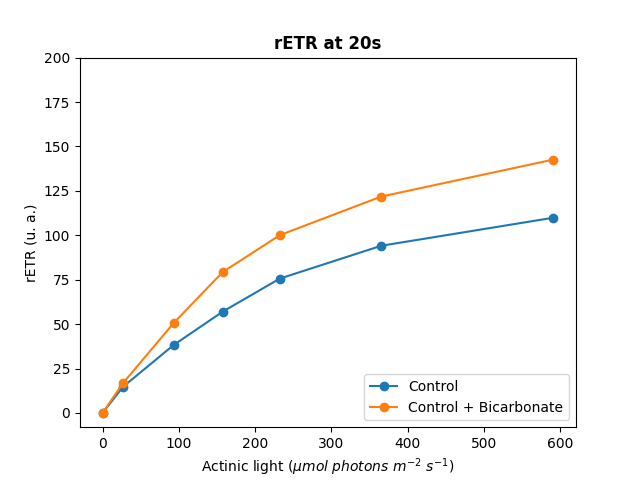

In [114]:
time = 20

fig, ax = plt.subplots()
conditions_to_compare = ["Control", "Control + Bicarbonate"]

for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, color = f"C{i}")

ax.legend(loc = 'lower right')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 200)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')


fig.savefig(f"{fig_folder}/ETR_{time}s_points_control_bicarbonate.png", dpi=300)

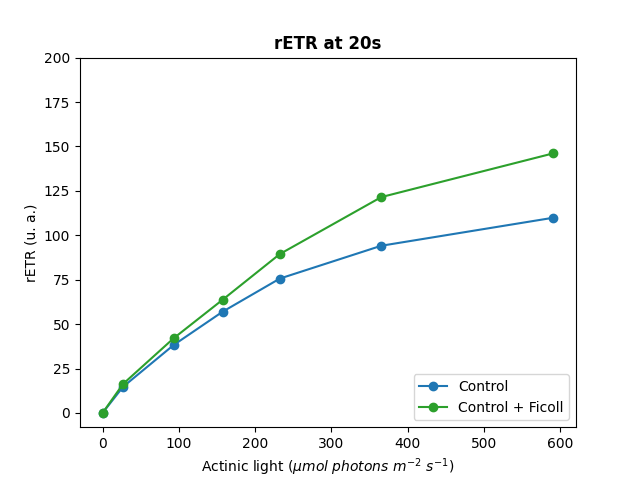

In [115]:
fig, ax = plt.subplots()
conditions_to_compare = ["Control", "Control + Ficoll"]

for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, color = f"C{i}")

ax.legend(loc = 'lower right')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 200)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')


fig.savefig(f"{fig_folder}/ETR_{time}s_points_ficoll.png", dpi=300)

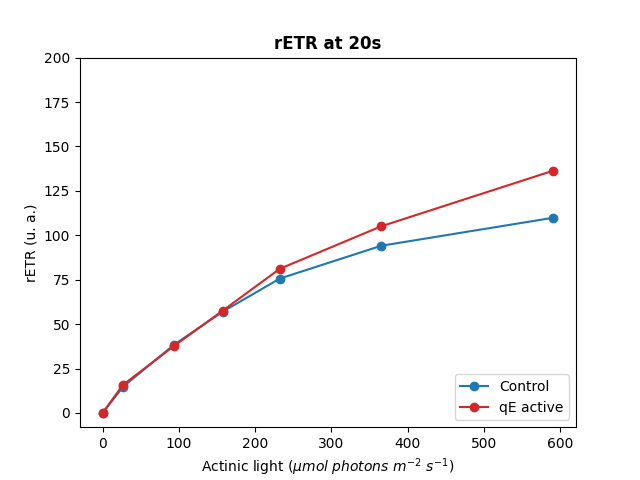

In [116]:
fig, ax = plt.subplots()
conditions_to_compare = ["Control", "qE active"]

for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, color = f"C{i}")

ax.legend(loc = 'lower right')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 200)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')


fig.savefig(f"{fig_folder}/ETR_{time}s_points_qE.png", dpi=300)

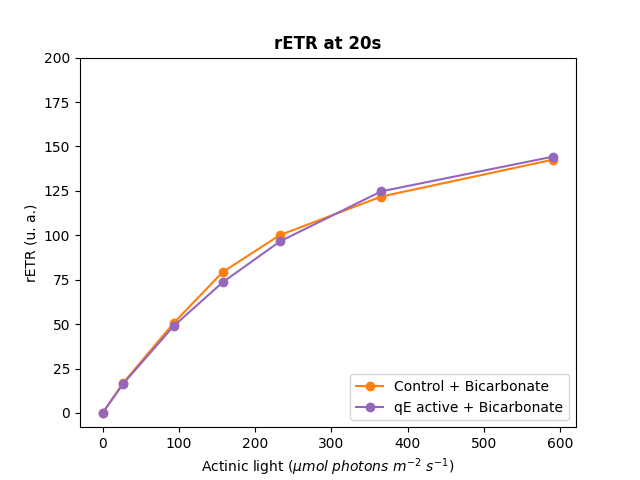

In [117]:
fig, ax = plt.subplots()
conditions_to_compare = ["Control + Bicarbonate", "qE active + Bicarbonate"]

for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, color = f"C{i}")

ax.legend(loc = 'lower right')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 200)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')


fig.savefig(f"{fig_folder}/ETR_{time}s_points_qE_bicarbonate.png", dpi=300)

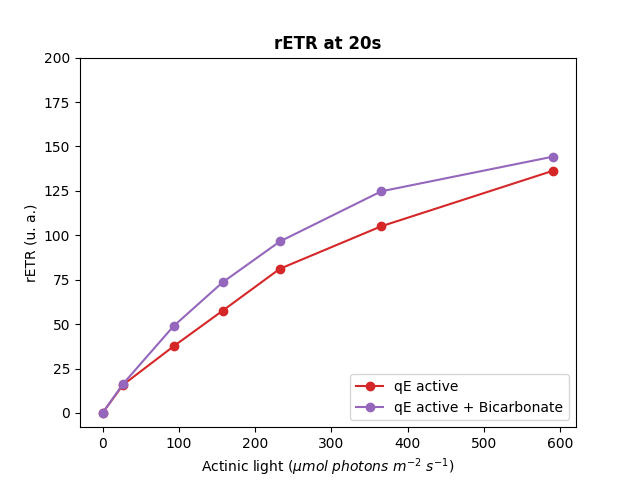

In [118]:
fig, ax = plt.subplots()
conditions_to_compare = ["qE active", "qE active + Bicarbonate"]

for condition in conditions_to_compare:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, color = f"C{i}")

ax.legend(loc = 'lower right')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 200)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')


fig.savefig(f"{fig_folder}/ETR_{time}s_points_qE_bicarbonate.png", dpi=300)

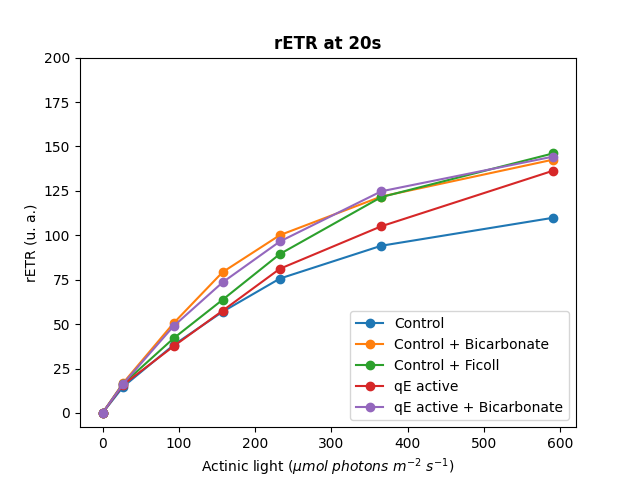

In [119]:
fig, ax = plt.subplots()

for condition in conditions:
    i = conditions.index(condition)
    ETR_matrix = np.asarray(results[i].ETR.tolist())
    ETR = ETR_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, ETR, 'o-', label = condition, color = f"C{i}")

ax.legend(loc = 'lower right')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("rETR (u. a.)")
ax.set_ylim(-8, 200)
ax.set_title(f"rETR at {time}s", fontsize = 12, fontweight = 'bold')


fig.savefig(f"{fig_folder}/ETR_{time}s_points_qE_all.png", dpi=300)

In [120]:
results[0]

,Record,Actinic,F_max,F_stat,F_0,phi_stat,phi_0,NPQ,ETR
0,AL0,0.0,"[1. 0.97391732, 0.96127952, 0.9533909 ]","[0.22393544, 0.22442948, 0.22257072, 0.22413721]",0.218374,"[0.776064563035561, 0.7695600311393487, 0.7684...",0.781626,"[0.0, 0.026781209549095488, 0.0402801453462147...","[0.0, 0.0, 0.0, 0.0]"
1,AL10,26.9,"[0.95759535, 0.90977895, 0.90167022, 0.9050898]","[0.43291641, 0.39290169, 0.37324285, 0.36992887]",0.222711,"[0.5479130000696557, 0.5681349955032455, 0.586...",0.767427,"[0.04428243051847011, 0.0991681004144833, 0.10...","[14.738859701873738, 15.282831379037304, 15.76..."
2,AL20,93.1,"[0.90769785, 0.87370209, 0.85141252, 0.8336409]","[0.53519839, 0.54066095, 0.50785871, 0.4864316]",0.224766,"[0.41037825047520143, 0.3811838669781504, 0.40...",0.752378,"[0.10168818953185293, 0.1445548888176342, 0.17...","[38.20621511924125, 35.4882180156658, 37.56681..."
3,AL30,157.4,"[0.85674201, 0.84373958, 0.83101952, 0.80746261]","[0.54659553, 0.55714278, 0.5448505, 0.53378965]",0.227511,"[0.3620068512703397, 0.339674477313812, 0.3443...",0.734446,"[0.1672125191394387, 0.1851998250246385, 0.203...","[56.97987838995147, 53.464762729194014, 54.202..."
4,AL40,232.5,"[0.82253281, 0.81191386, 0.79964959, 0.76167618]","[0.55490248, 0.56000674, 0.54914888, 0.53235522]",0.228642,"[0.32537343489825477, 0.31026335823511375, 0.3...",0.722027,"[0.21575697943472505, 0.23165775752530313, 0.2...","[75.64932361384423, 72.13623078966394, 72.8336..."
5,AL60,365.5,"[0.78618247, 0.76785945, 0.73218391, 0.70066368]","[0.58374385, 0.57201042, 0.54845429, 0.53240047]",0.230485,"[0.2574957225073884, 0.25505843279649265, 0.25...",0.706830,"[0.2719693434579107, 0.30232167572983076, 0.36...","[94.11468657645045, 93.22385718711807, 91.7162..."
6,AL90,591.3,"[0.75063256, 0.71840974, 0.67954629, 0.64076445]","[0.61112755, 0.58880408, 0.55185876, 0.54030509]",0.234245,"[0.18584992565297995, 0.18040632174338816, 0.1...",0.687937,"[0.33220973560896394, 0.39196331690360064, 0.4...","[109.89306103860703, 106.67425804686542, 111.1..."


In [138]:
results[0].F_max[0]

[1.0, 0.97391732, 0.96127952, 0.9533909]

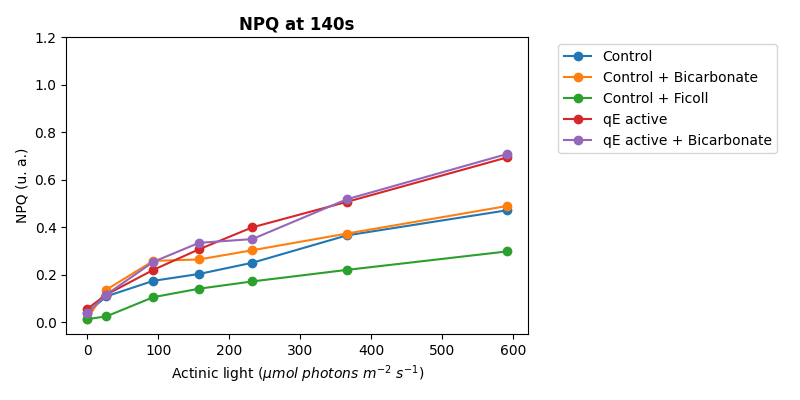

In [145]:
time = 140
fig, ax = plt.subplots(figsize = (8, 4))

for condition in conditions:
    i = conditions.index(condition)
    NPQ_matrix = np.asarray(results[i].NPQ.tolist())
    NPQ = NPQ_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, NPQ, 'o-', label = condition, color = f"C{i}")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("NPQ (u. a.)")
ax.set_ylim(-0.05, 1.2)
ax.set_title(f"NPQ at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/NPQ_{time}s_all.png", dpi=300)

In [124]:
results[0].F_max[0]

'[1.         0.97391732, 0.96127952, 0.9533909 ]'

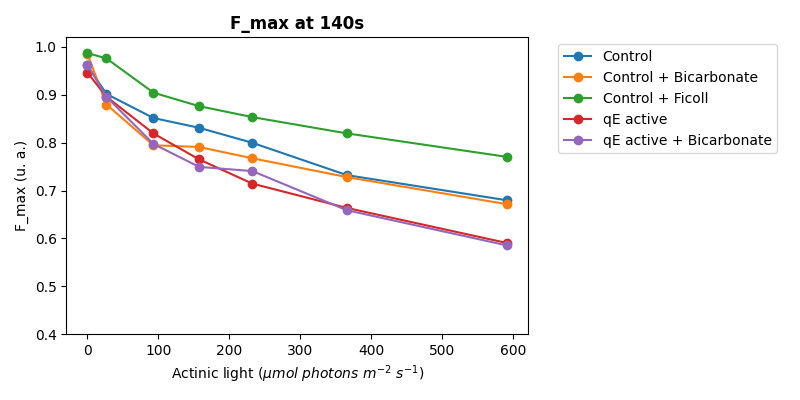

In [147]:
time = 140
fig, ax = plt.subplots(figsize = (8, 4))

for condition in conditions:
    i = conditions.index(condition)
    F_max_matrix = np.asarray(results[i].F_max.tolist())
    F_max = F_max_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_max, 'o-', label = condition, color = f"C{i}")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_max (u. a.)")
ax.set_ylim(0.4, 1.02)
ax.set_title(f"F_max at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_max_{time}s_all.png", dpi=300)

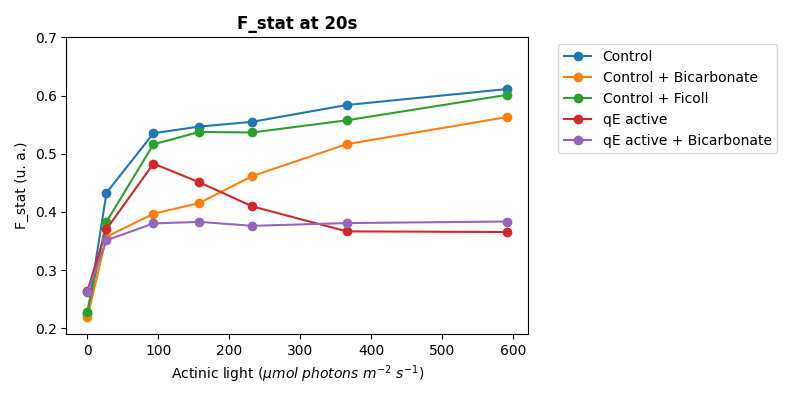

In [151]:
time = 20
fig, ax = plt.subplots(figsize = (8, 4))

for condition in conditions:
    i = conditions.index(condition)
    F_stat_matrix = np.asarray(results[i].F_stat.tolist())
    F_stat = F_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, F_stat, 'o-', label = condition, color = f"C{i}")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("F_stat (u. a.)")
ax.set_ylim(0.19, 0.7)
ax.set_title(f"F_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/F_stat_{time}s_all.png", dpi=300)

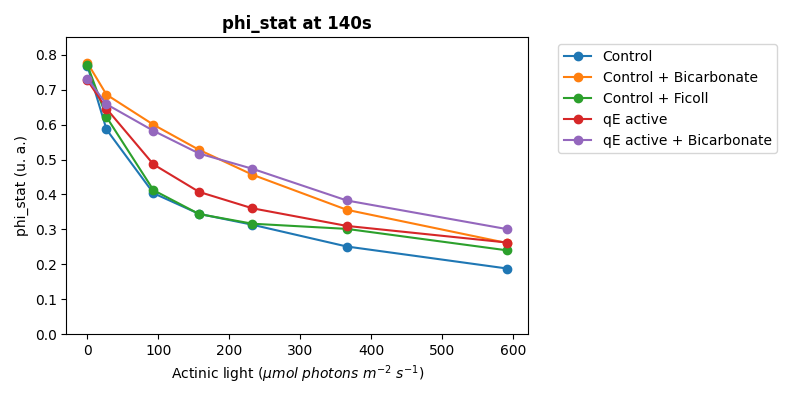

In [154]:
time = 140
fig, ax = plt.subplots(figsize = (8, 4))

for condition in conditions:
    i = conditions.index(condition)
    phi_stat_matrix = np.asarray(results[i].phi_stat.tolist())
    phi_stat = phi_stat_matrix[:, times_Fmax.index(time)]
    light = results[i].Actinic.tolist()
    ax.plot(light, phi_stat, 'o-', label = condition, color = f"C{i}")

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xlabel("Actinic light ($µmol$ $photons$ $m^{-2}$ $s^{-1}$)")
ax.set_ylabel("phi_stat (u. a.)")
ax.set_ylim(0, 0.85)
ax.set_title(f"phi_stat at {time}s", fontsize = 12, fontweight = 'bold')
fig.tight_layout()

fig.savefig(f"{fig_folder}/phi_stat_{time}s_all.png", dpi=300)